##### Sergio Duque Mejía, c.c 1036654435
##### Mail: sergio.duquem@udea.edu.co

## Homework 7
Teach a NN model to predict the price of the houses from the 'kc_house_data.csv' dataset.

### Steps
* clean the data (NaN, repeated values, correlation...)
* split into train and test
* use functions:
    * get_model(input_shape)
    * get_regularized_model(input_shape,weight_decay,drop_rate)
    * compile_model()
* use metrics=['mape'] when compiling model
* scores=model.evaluate(X_test,y_test) should return mean absolute percentage error
* use ModelCheckpoint() callback to save the entire model into .h5 file
* (you can possibly normalize the data before training the algorithm) check this out

    * "id": Numero de identificacion de la vivienda
    * "Date": Fecha en que se vendió la casa
    * "Price": el precio es el objetivo de predicción
    * "Bedrooms": Número de Dormitorios/Casa
    * "Bathrooms": Número de baños/Casa
    * "Sqft_Living": pies cuadrados de la casa
    * "Sqft_Lot": pies cuadrados del lote
    * "Floors": Total de pisos oniveles) en casa
    * "Waterfront": Casa que tiene vista a la costanera
    * "View": Ha sido visto
    * "Condition": Qué tan buena es la condición ogeneral)
    * "Grade": calificación de vivienda, según el sistema del condado de King
    * "Sqft_above": pies cuadrados de la casa aparte del sótano
    * "Sqft_Basement": pies cuadrados del sótano
    * "Yr_Built": año de construcción
    * "Yr_Renovated": año en que se renovó la casa
    * "Zipcode": código postal
    * "Lat": Coordenada de latitud
    * "Long": Coordenada de longitud
    * "Sqft_Living15": Área de la sala de estar en 2015 oimplica algunas renovaciones)
    * "Sqft_Lot15": área del tamaño del lote en 2015 oimplica algunas renovaciones) 

In [1]:
# Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("kc_house_data.csv")
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21615 entries, 0 to 21614
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21615 non-null  int64  
 1   date           21615 non-null  object 
 2   price          21615 non-null  float64
 3   bedrooms       21615 non-null  int64  
 4   bathrooms      21615 non-null  float64
 5   sqft_living    21615 non-null  int64  
 6   sqft_lot       21614 non-null  float64
 7   floors         21615 non-null  float64
 8   waterfront     21615 non-null  int64  
 9   view           21615 non-null  int64  
 10  condition      21615 non-null  int64  
 11  grade          21615 non-null  int64  
 12  sqft_above     21615 non-null  int64  
 13  sqft_basement  21615 non-null  int64  
 14  yr_built       21615 non-null  int64  
 15  yr_renovated   21615 non-null  int64  
 16  zipcode        21615 non-null  int64  
 17  lat            21615 non-null  float64
 18  long  

#### Duplicated data

In [4]:
data[data.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
99,722079104,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036
100,722079104,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036


In [5]:
data.drop_duplicates(inplace=True) # delete duplicated data
print(data["id"][98]) # the duplicated data is stored in the index 98 and was duplicated 2 times in index 99,100
print(data.shape)

722079104
(21613, 21)


#### Missing values

In [6]:
# shows all the columns with null values and shows how many nulls there are.
def null_values(data):
    flag = False
    null = data.isna().sum().to_dict()
    for i in null.items():
        if i[1] != 0:
            flag = True
            print(i)
    if flag == False:
        print('NaN = 0')

In [7]:
null_values(data) # check what columns have missing values

('sqft_lot', 1)


In [8]:
data[data["sqft_lot"].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
109,3530510041,20140723T000000,188500.0,2,1.75,1240,NaN,1.0,0,0,...,8,1240,0,1985,0,98198,47.3813,-122.322,1270,4966


It is possible to change the NaN value for 0, mean or median but for this analysis, I am going to delete that row, because it does not represent a lot of change in the magnitud of the dataset (this because there are a lot of data)

In [9]:
print("original shape:", data.shape)
data.dropna(axis=0,inplace=True) # delete the row with NaNs
null_values(data) # if output is NaN=0, it was succesful the elimination of the row.
print("after dropna:", data.shape)

original shape: (21613, 21)
NaN = 0
after dropna: (21612, 21)


#### Correlation matrix

We define 80% as the correlation limit, so base on that, I am going to delete one of the features that is correlated above that 80% with another one

<AxesSubplot:>

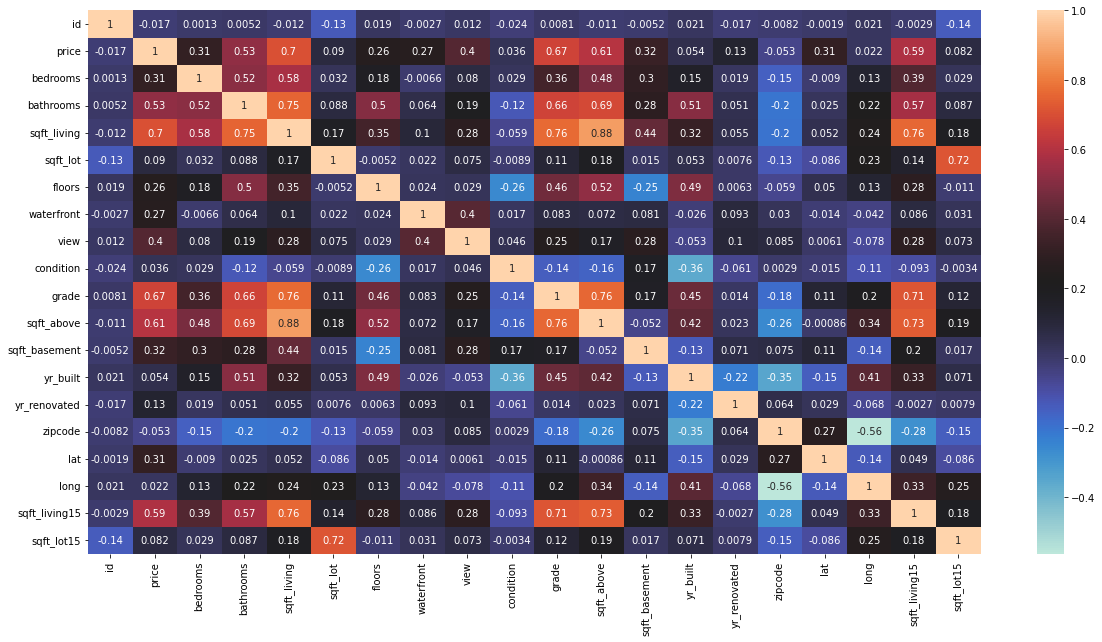

In [10]:
plt.figure(figsize=(20,10))
corr_values = data.corr()
sns.heatmap(corr_values,cmap="icefire",annot=True)

In this case it is easy to see that --sqft_above-- and --sqft_living-- has a correlation value of 0.88% so we are going to delete --sqft_above-- because is less linear that the other one with respect to --price--

In [11]:
col_values = data.columns.values
col_values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

#### Analysis about house features

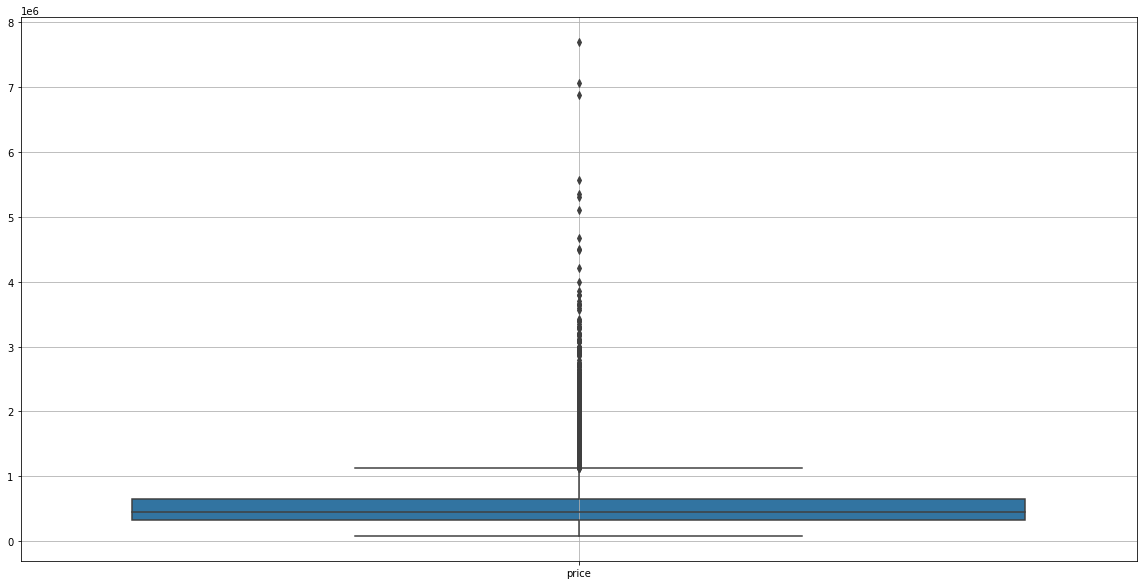

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data[['price']])
plt.grid()

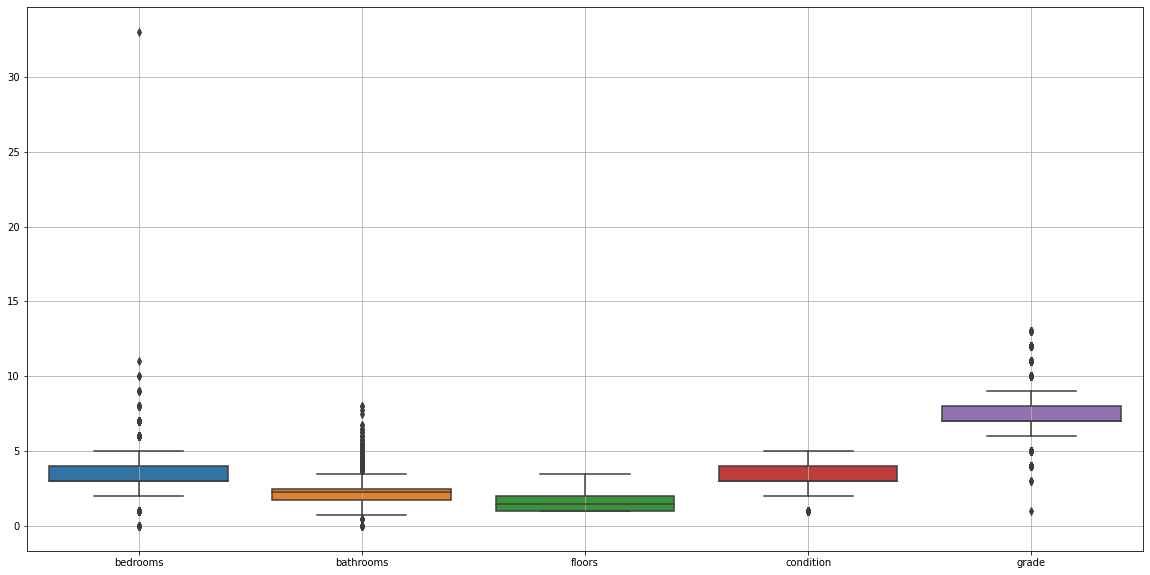

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data[['bedrooms','bathrooms','floors','condition','grade']])
plt.grid()

In [14]:
data.bedrooms.value_counts()

3     9824
4     6882
2     2759
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [15]:
data[data["bedrooms"] > 15]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15872,2402100895,20140625T000000,640000.0,33,1.75,1620,6000.0,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [16]:
data.drop(15872,axis=0,inplace=True)

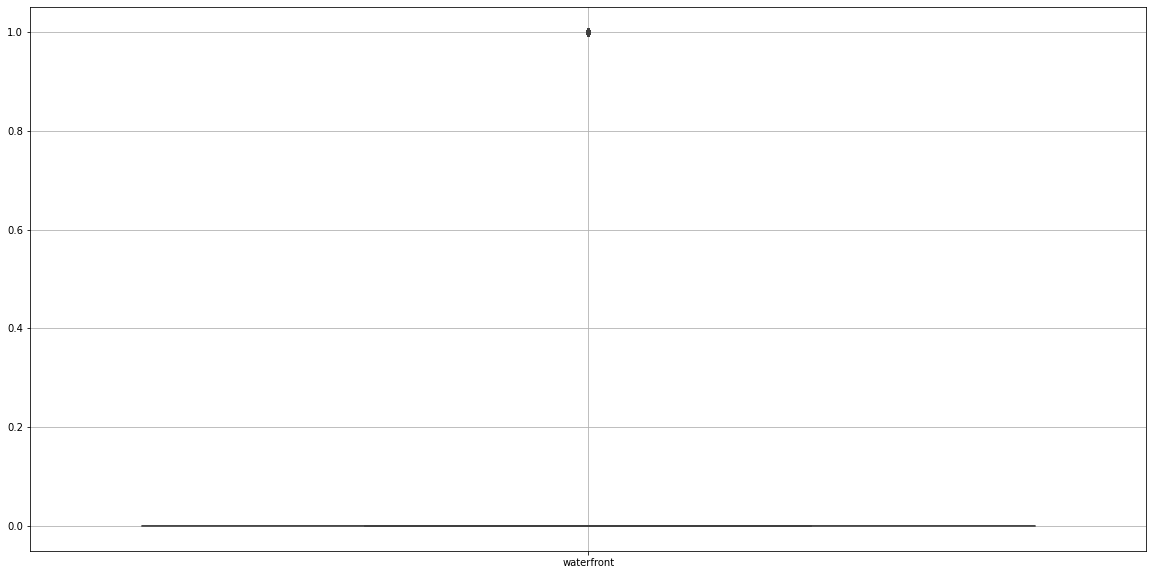

In [17]:

plt.figure(figsize=(20,10))
sns.boxplot(data=data[['waterfront']])
plt.grid()

In [18]:
data.waterfront.value_counts()

0    21448
1      163
Name: waterfront, dtype: int64

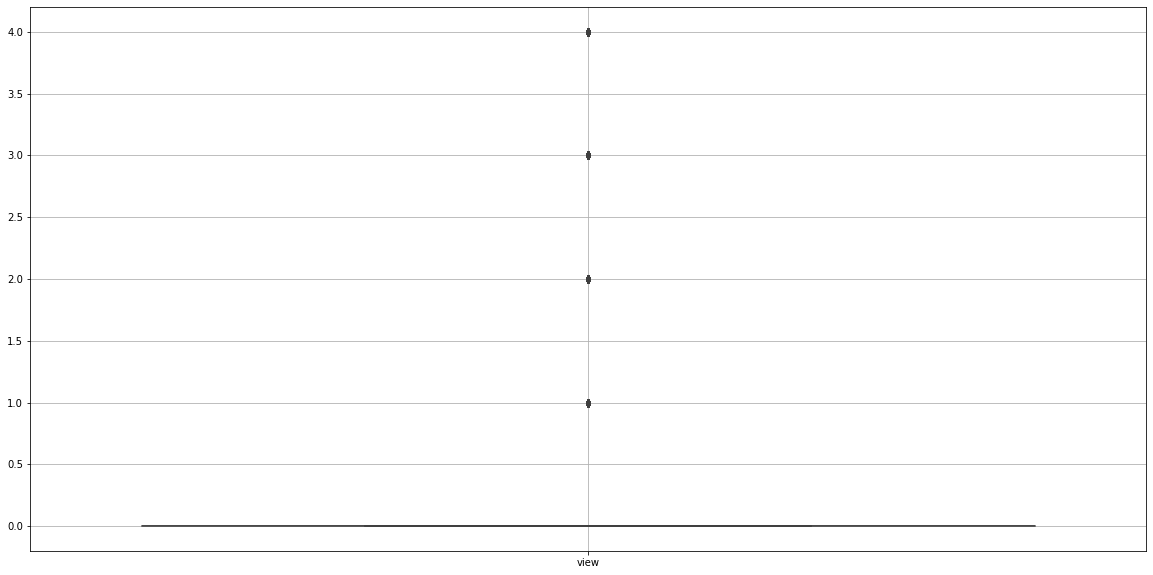

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data[['view']])
plt.grid()

In [20]:
data.view.value_counts()

0    19487
2      963
3      510
1      332
4      319
Name: view, dtype: int64

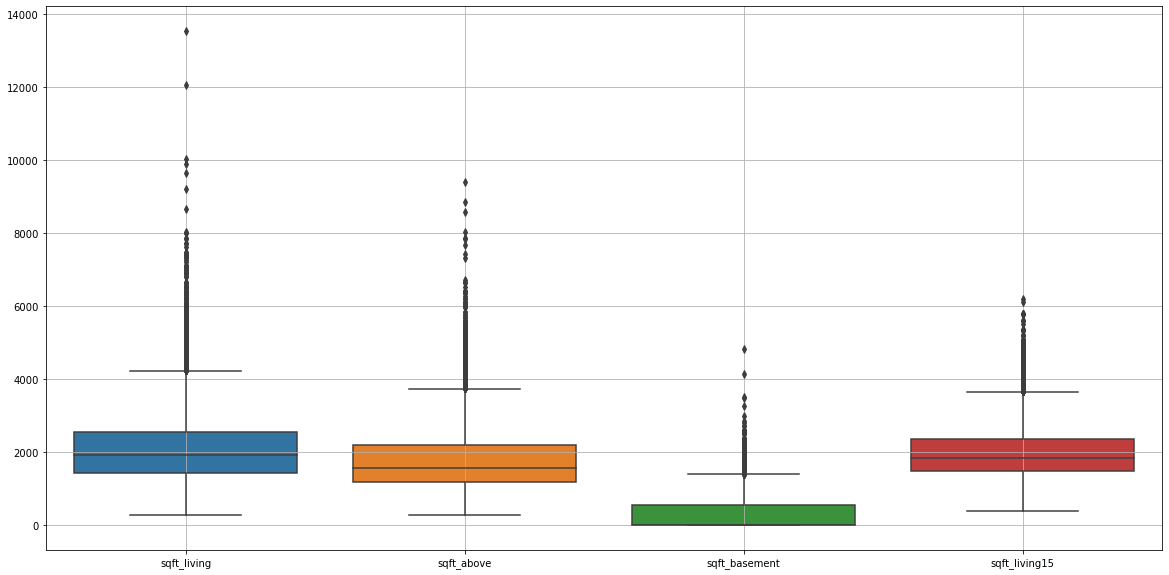

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data[['sqft_living','sqft_above','sqft_basement','sqft_living15']])
plt.grid()

In [22]:
data[data.sqft_living > 12000 ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7254,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600.0,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
12779,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752.0,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [23]:
data.drop([7254,12779],axis=0,inplace=True)

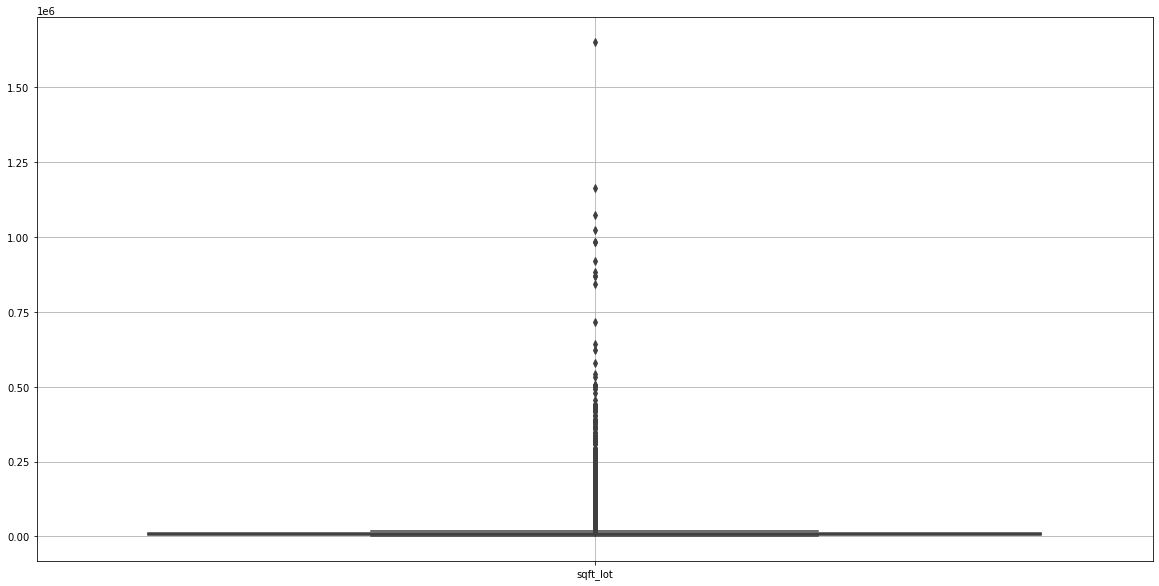

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data[['sqft_lot']])
plt.grid()

In [25]:
data[data.sqft_lot > 1e6 ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1721,1020069017,20150327T000000,700000.0,4,1.00,1300,1651359.0,1.0,0,3,...,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581
7649,2623069031,20140521T000000,542500.0,5,3.25,3010,1074218.0,1.5,0,0,...,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825
7771,2323089009,20150119T000000,855000.0,4,3.50,4030,1024068.0,2.0,0,0,...,10,4030,0,2006,0,98045,47.4619,-121.744,1830,11700
17321,3326079016,20150504T000000,190000.0,2,1.00,710,1164794.0,1.0,0,0,...,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730


In [26]:
data.drop(1721,axis=0,inplace=True)

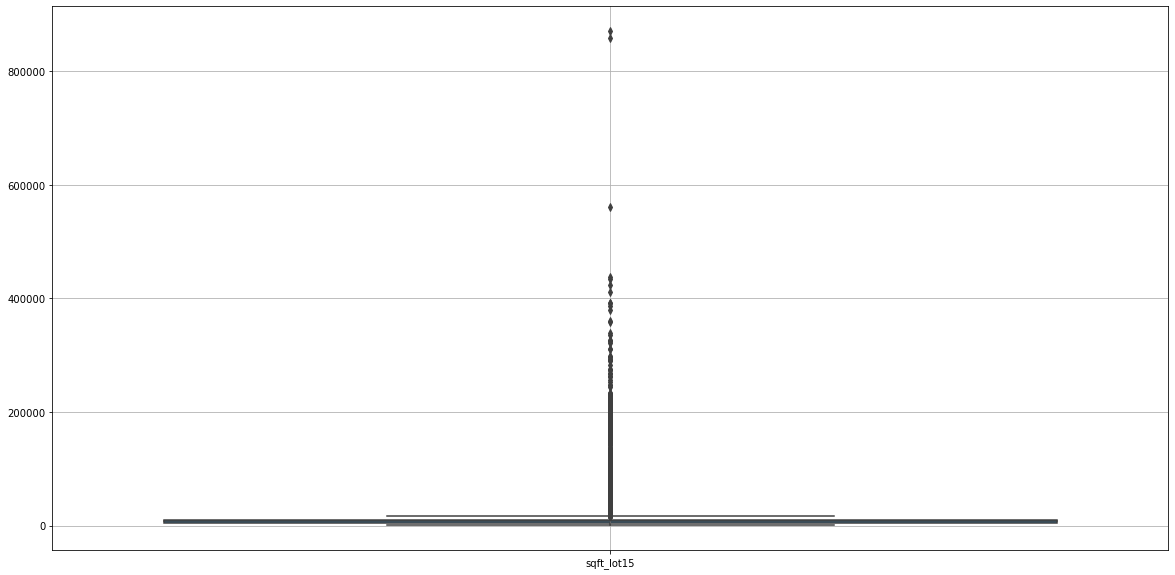

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data[['sqft_lot15']])
plt.grid()

In [28]:
data.drop(['sqft_above'], axis=1, inplace=True)

In [29]:
data.shape

(21608, 20)

In [30]:
data.index = range(len(data))

#### Datetime

In [31]:
date = data.date
data['date'] = pd.to_datetime(date)
data['Month'] = data['date'].apply(lambda x: x.month)
data['Year'] = data['date'].apply(lambda x: x.year)

In [32]:
data.drop('date',axis=1,inplace=True)

### Exploratory analysis

In [33]:
an_colums = ['price','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Month', 'Year']

data_an = data[an_colums]

In [34]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
count,2.160800e+04,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,...,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,4.580670e+09,5.396805e+05,3.369215,2.114298,2079.004211,1.501813e+04,1.494261,0.007544,0.233895,3.409293,...,291.197473,1971.009487,84.329832,98077.935718,47.560062,-122.213900,1986.366577,12740.780498,6.574509,2014.322982
std,2.876620e+09,3.637215e+05,0.907495,0.768123,912.676664,3.985168e+04,0.539879,0.086527,0.765512,0.650685,...,441.309135,29.370602,401.515494,53.502838,0.138551,0.140824,685.021821,27126.571061,3.115464,0.467627
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000
25%,2.123049e+09,3.218375e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471075,-122.328000,1490.000000,5100.000000,4.000000,2014.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,2014.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,2015.000000
max,9.900000e+09,7.062500e+06,11.000000,7.750000,10040.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000


# Normalization and Training/Test split

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [68]:
target = ['price']
X_data = data.to_numpy()[:,2:]
y_data = data[target].to_numpy().flatten()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=500)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17286, 19)
(17286,)
(4322, 19)
(4322,)


In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test) 

# Model

In [71]:
from tensorflow.keras.layers import InputLayer,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import MAPE
from tensorflow.keras import regularizers


In [74]:
def get_model(input_shape):
    model=Sequential([
                  InputLayer(input_shape=input_shape),
                  Dense(units=192,activation='relu',name='layer_hidden1'),
                  Dense(units=192,activation='relu',name='layer_hidden2'),
                  Dense(units=192,activation='relu',name='layer_hidden3'),
                  Dense(units=1,activation='linear',name='output_layer')
                 ])
    return model

In [75]:
def get_regularized_model(input_shape,wd, drop_rate):
    model=Sequential([InputLayer(input_shape=input_shape),
                Dense(192, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dropout(drop_rate),
                Dense(192, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dropout(drop_rate),
                Dense(192, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dropout(drop_rate),
                Dense(units=1,activation='linear') # by default
    ])
    return model

In [76]:
def compile_model(model):
        model.compile(optimizer='adam',
              loss='mae',   
              metrics=['mape'])

### Secuential Model without Regularizers

In [78]:
model = get_model(X_train_scaled[0].shape)
compile_model(model)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_hidden1 (Dense)        (None, 192)               3840      
_________________________________________________________________
layer_hidden2 (Dense)        (None, 192)               37056     
_________________________________________________________________
layer_hidden3 (Dense)        (None, 192)               37056     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 193       
Total params: 78,145
Trainable params: 78,145
Non-trainable params: 0
_________________________________________________________________


In [79]:
myhistory=model.fit(X_train_scaled, y_train,  epochs=100, validation_split=0.2, verbose=0)

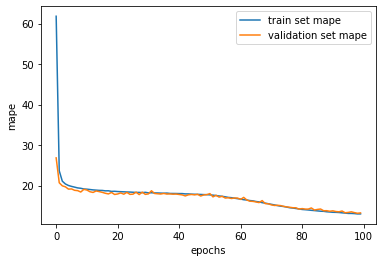

In [80]:
import matplotlib.pyplot as plt
xvals=range(100)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['mape'],label='train set mape')
ax.plot(xvals, myhistory.history['val_mape'],label='validation set mape')
ax.set_xlabel('epochs')
ax.set_ylabel('mape')
ax.legend()

In [82]:
scores=model.evaluate(X_test_scaled,y_test)
print(scores)

136/136 [==============================] - 0s 560us/step - loss: 72649.6562 - mape: 13.6107
[72649.65625, 13.610692977905273]


### Secuential Model with Regularizers and Dropout

In [83]:
model = get_regularized_model(X_train_scaled[0].shape,0.01,0.2)
compile_model(model)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 192)               3840      
_________________________________________________________________
dropout (Dropout)            (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 192)               37056     
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               37056     
_________________________________________________________________
dropout_2 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [84]:
myhistory=model.fit(X_train_scaled, y_train,  epochs=100, validation_split=0.2, verbose=0)

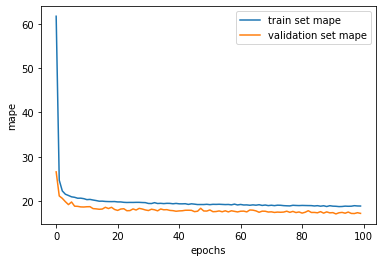

In [85]:
import matplotlib.pyplot as plt
xvals=range(100)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['mape'],label='train set mape')
ax.plot(xvals, myhistory.history['val_mape'],label='validation set mape')
ax.set_xlabel('epochs')
ax.set_ylabel('mape')
ax.legend()

In [86]:
scores=model.evaluate(X_test_scaled,y_test)
print(scores)

136/136 [==============================] - 0s 587us/step - loss: 92399.4141 - mape: 17.2685
[92399.4140625, 17.268512725830078]


# Conclution:
based on the results, the model is better train when we use the model without regularizers, this is probably because the learning rate is really high and overfits the data, we can saw in the graph without regularizers that both train and validation mape curves are fine so in this case is not necesary to think about using regularizers or dropout methods.